In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn_extra.cluster import KMedoids

In [ ]:
from google.colab import files
d = files.upload()

Saving Shopping_center.csv to Shopping_center.csv


In [ ]:
df = pd.read_csv('Shopping_center.csv')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer ID              200 non-null    int64 
 1   Gender                   200 non-null    object
 2   Age                      200 non-null    int64 
 3   Annual Income in K$      200 non-null    int64 
 4   Spending Points (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Annual Income in K$,0
Spending Points (1-100),0


In [ ]:
X = df.iloc[:,3:5].values

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)

In [ ]:
Y = kmeans.fit_predict(X)

In [ ]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

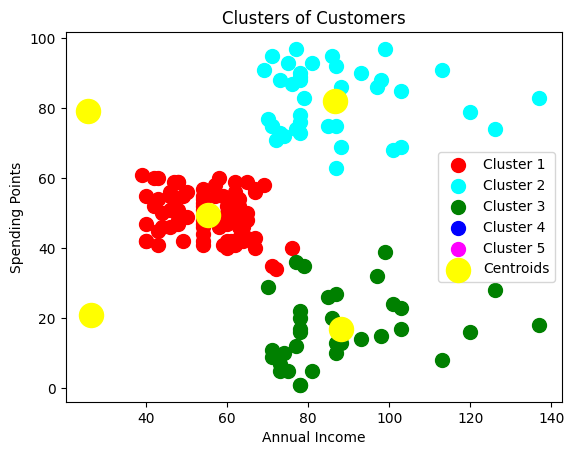

In [ ]:
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[kmeans==3, 0], X[kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[kmeans==4, 0], X[kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids' )
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

# **Below code has issues**

Your code contains a few issues:

Minkowski Distance with KMeans:

KMeans in scikit-learn does not support custom distance metrics directly. It always uses the Euclidean distance. If you need Minkowski or other distance metrics, consider KMedoids from scikit-learn-extra or implement a custom KMeans.
Incorrect Attribute Assignment (kmeans.distance_metric)

KMeans does not have a distance_metric attribute. Overriding it like this won’t affect the clustering.
Missing Imports and Variables (X and pairwise_distances)

You need to import pairwise_distances from sklearn.metrics and define X.


In [ ]:
# Define the Minkowski distance metric
def minkowski_distance(X, Y, p):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# Create a KMeans model with Minkowski distance metric
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)

# Define a custom distance metric for KMeans
kmeans.distance_metric = lambda X, Y: minkowski_distance(X, Y, p=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:", centers)

Cluster labels: [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Cluster centers: [[26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]



**KMeans and KMedoids** are both clustering algorithms, but they differ in how they determine cluster centers and handle distance metrics. KMeans uses the mean of all points in a cluster as the centroid, making it computationally efficient but sensitive to outliers, as centroids can be influenced by extreme values. It also strictly uses Euclidean distance to measure similarity. In contrast, KMedoids selects actual data points (medoids) as cluster centers, making it more robust to outliers. KMedoids also allows for flexible distance metrics (e.g., Minkowski, Manhattan), making it useful for non-Euclidean spaces. However, KMedoids is computationally more expensive than KMeans, as it requires pairwise distance calculations and iterative medoid swaps.

In [32]:

def minkowski_distance(X, Y, p=3):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# Create and fit KMedoids model with Minkowski distance
kmedoids = KMedoids(n_clusters=5, metric="precomputed", random_state=42)
distance_matrix = minkowski_distance(X, X, p=3)  # Compute distance matrix
kmedoids.fit(distance_matrix)  # Fit using the precomputed distance matrix

# Get cluster labels and medoids
labels = kmedoids.labels_
medoids = X[kmedoids.medoid_indices_]

print("Cluster labels:", labels)
print("Cluster centers (medoids):", medoids)

Cluster labels: [4 0 1 4 0 4 3 1 4 1 3 1 4 4 3 3 4 2 1 0 4 4 4 4 1 2 2 2 1 1 1 3 4 4 4 3 4
 2 3 1 0 1 1 0 0 4 0 0 0 1 4 4 3 4 1 1 2 2 3 0 2 1 1 2 4 1 1 3 0 4 3 1 1 0
 1 3 4 3 2 4 4 0 4 1 4 3 1 3 0 3 1 2 4 0 1 4 0 1 2 2]
Cluster centers (medoids): [[0.76078505 0.5612772 ]
 [0.32078006 0.18651851]
 [0.81801477 0.86073058]
 [0.80367208 0.18657006]
 [0.23763754 0.72821635]]


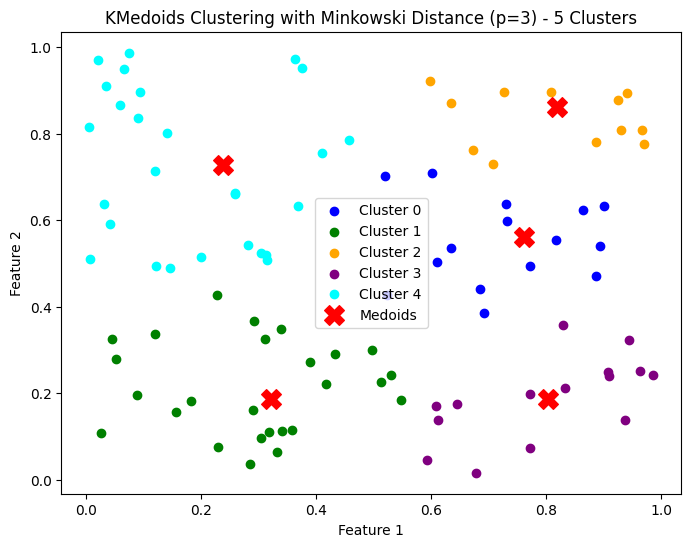

In [33]:
# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange', 'purple', 'cyan']  # Colors for clusters

for i in range(5):  # Loop for 5 clusters
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f"Cluster {i}")

# Plot medoids
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='X', s=200, label="Medoids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMedoids Clustering with Minkowski Distance (p=3) - 5 Clusters")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances


# Step 1: Use KMeans++ to initialize cluster centers
kmeans_init = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_init.fit(X)
centers = kmeans_init.cluster_centers_  # Initial centers

# Step 2: Perform clustering using Manhattan distance
def manhattan_kmeans(X, centers, max_iters=100, tol=1e-4):
    for _ in range(max_iters):
        # Compute Manhattan distance from each point to each center
        distances = manhattan_distances(X, centers)

        # Assign each point to the closest cluster
        labels = np.argmin(distances, axis=1)

        # Compute new cluster centers using the median of assigned points
        new_centers = np.array([
            np.median(X[labels == i], axis=0) if np.any(labels == i) else centers[i]
            for i in range(len(centers))
        ])

        # Check for convergence (if centers don't change significantly)
        if np.linalg.norm(new_centers - centers) < tol:
            break

        centers = new_centers

    return labels, centers

# Step 3: Run the custom Manhattan KMeans
labels, centers = manhattan_kmeans(X, centers)

# Print the results
print("Cluster labels:", labels)
print("Cluster centers:", centers)


Cluster labels: [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 0 2 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Cluster centers: [[54.  50. ]
 [79.  83. ]
 [24.5 77. ]
 [80.  16.5]
 [24.  15. ]]


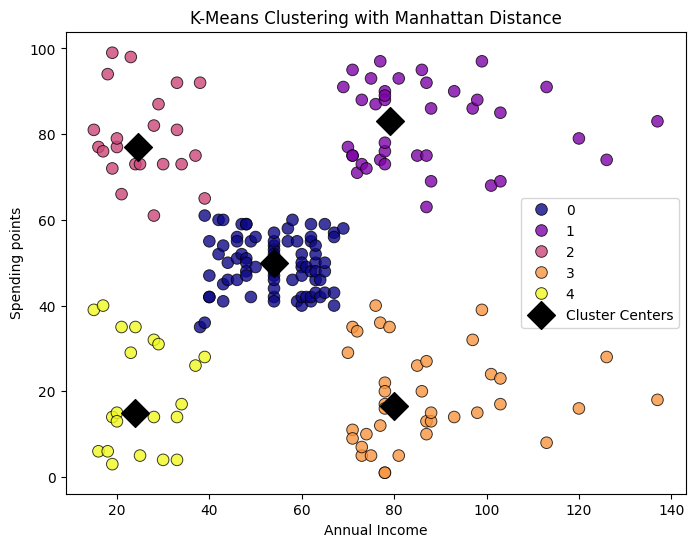

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='plasma', s=70, edgecolor='k', alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='D', s=200, label='Cluster Centers')

plt.title("K-Means Clustering with Manhattan Distance")
plt.xlabel("Annual Income")
plt.ylabel("Spending points")
plt.legend()
plt.show()